In [1]:
import pandas as pd

In [5]:
disabled_person_df = pd.read_csv('/Users/ktg/Desktop/Jeju-Specialties/test/시도별_장애유형별_성별_등록장애인수.csv', encoding='utf-8')
person_df = pd.read_csv('/Users/ktg/Desktop/Jeju-Specialties/test/행정구역_시군구_별_1세별_주민등록인구.csv')

In [19]:
disabled_person_df.head()

,시도별,성별,장애유형별,2022
0,전국,계,합계,2652860
1,전국,계,지체,1176291
2,전국,계,시각,250767
3,전국,계,청각,425224
4,전국,계,언어,23349


In [18]:
person_df.head()

,행정구역,항목,연령별,value
0,전국,총인구수 (명),계,51439038
1,전국,총인구수 (명),0세,244250
2,전국,총인구수 (명),1세,264788
3,전국,총인구수 (명),2세,277529
4,전국,총인구수 (명),3세,307975


In [27]:
# 칼럼명 변경
person_df.rename(columns={'행정구역(시군구)별':'행정구역', '2022':'value'}, inplace=True)
disabled_person_df.rename(columns={'시도별':'행정구역', '2022':'value'}, inplace=True)

In [41]:
cond_행정구역_전국 = person_df['행정구역'] == '전국'
cond_행정구역_세종 = person_df['행정구역'] == '세종특별자치시'
cond_행정구역_서울 = person_df['행정구역'] == '서울특별시'
cond_항목 = person_df['항목'] == '총인구수 (명)'
cond_연령별 = person_df['연령별'] == '계'

df_1 = person_df[cond_행정구역_전국 & cond_항목 & cond_연령별]
df_2 = person_df[cond_행정구역_세종 & cond_항목 & cond_연령별]
df_3 = person_df[cond_행정구역_서울 & cond_항목 & cond_연령별]

In [42]:
df_1, df_2, df_3

(  행정구역        항목 연령별     value
 0   전국  총인구수 (명)   계  51439038,
          행정구역        항목 연령별   value
 2448  세종특별자치시  총인구수 (명)   계  383591,
       행정구역        항목 연령별    value
 306  서울특별시  총인구수 (명)   계  9428372)

In [46]:
cond_행정구역_전국 = disabled_person_df['행정구역'] == '전국'
cond_행정구역_세종 = disabled_person_df['행정구역'] == '세종특별자치시'
cond_행정구역_서울 = disabled_person_df['행정구역'] == '서울특별시'
cond_장애유형별 = disabled_person_df['장애유형별'] == '합계'
cond_성별 = disabled_person_df['성별'] == '계'

df_4 = disabled_person_df[cond_행정구역_전국 & cond_장애유형별 & cond_성별]
df_5 = disabled_person_df[cond_행정구역_세종 & cond_장애유형별 & cond_성별]
df_6 = disabled_person_df[cond_행정구역_서울 & cond_장애유형별 & cond_성별]

In [47]:
df_4, df_5, df_6

(  행정구역 성별 장애유형별    value
 0   전국  계    합계  2652860,
         행정구역 성별 장애유형별  value
 384  세종특별자치시  계    합계  12863,
      행정구역 성별 장애유형별   value
 48  서울특별시  계    합계  391859)

In [37]:
2652860 / 51439038,  12863 / 383591

(0.05157289294562624, 0.03353311209074249)

In [55]:
399396 / 51439038, 72949 / 9428372, 1908 / 383591

(0.007764453137712257, 0.007737178804569866, 0.004974047879121251)

In [54]:
1908/399396, 383591/51439038

(0.004777213592524712, 0.007457196225170463)

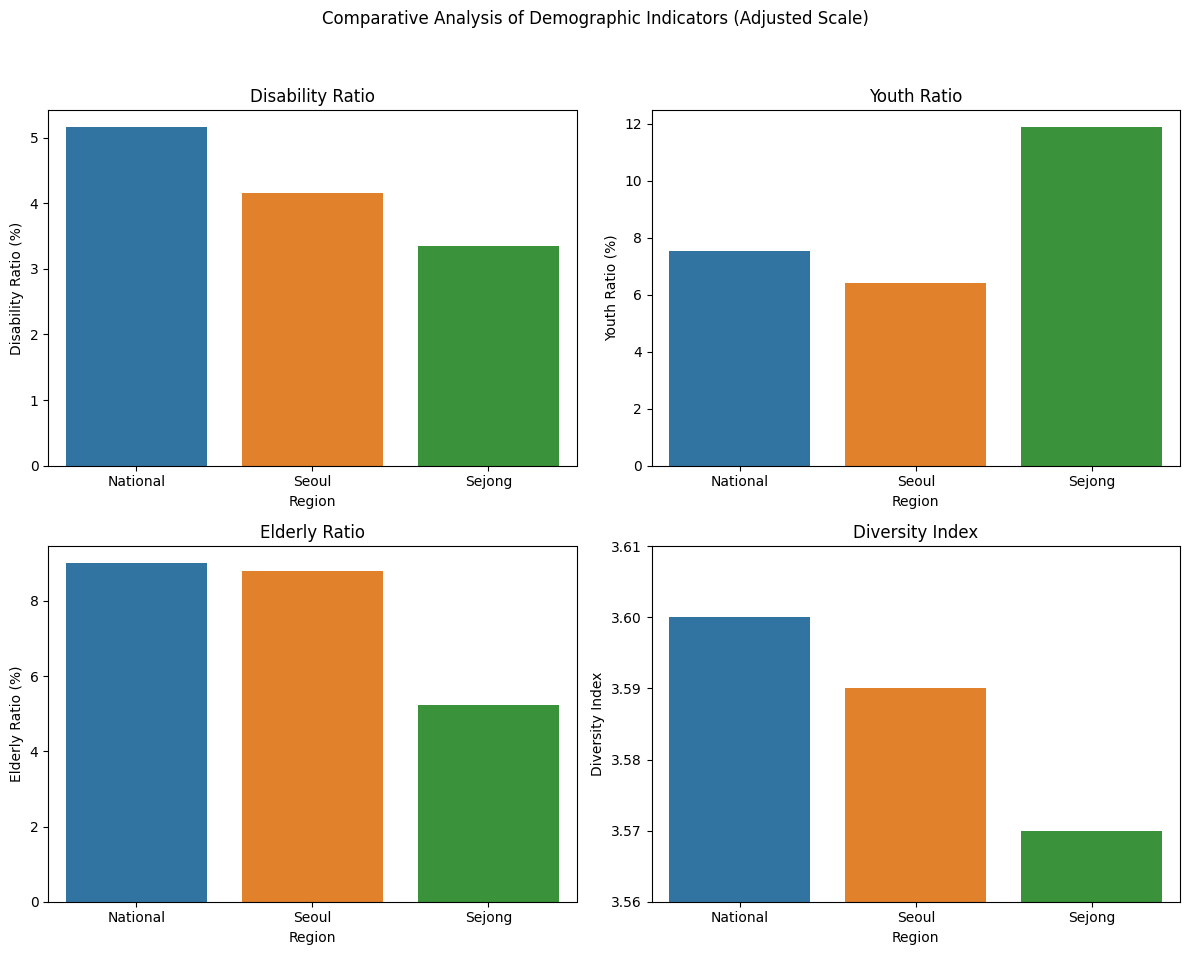

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data_for_report = {
    "Region": ["National", "Seoul", "Sejong"],
    "Total Population": [51439038, 9428372, 383591],
    "Disability Ratio (%)": [(2652860 / 51439038) * 100, (391859 / 9428372) * 100, (12863 / 383591) * 100],
    "Youth Ratio (%)": [7.53, 6.41, 11.88],  # 예시로 사용된 수치입니다
    "Elderly Ratio (%)": [9.00, 8.79, 5.24],  # 예시로 사용된 수치입니다
    "Diversity Index": [3.60, 3.59, 3.57]  # 예시로 사용된 수치입니다
}

# 데이터프레임 생성
report_df = pd.DataFrame(data_for_report)

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
fig.suptitle('Comparative Analysis of Demographic Indicators (Adjusted Scale)')

# 장애인 비율
sns.barplot(x="Region", y="Disability Ratio (%)", data=report_df, ax=axes[0, 0])
axes[0, 0].set_title("Disability Ratio")

# 청소년 비율
sns.barplot(x="Region", y="Youth Ratio (%)", data=report_df, ax=axes[0, 1])
axes[0, 1].set_title("Youth Ratio")

# 노인 비율
sns.barplot(x="Region", y="Elderly Ratio (%)", data=report_df, ax=axes[1, 0])
axes[1, 0].set_title("Elderly Ratio")

# 다양성 지수 (조정된 스케일)
sns.barplot(x="Region", y="Diversity Index", data=report_df, ax=axes[1, 1])
axes[1, 1].set_title("Diversity Index")
diversity_index_min = report_df["Diversity Index"].min() - 0.01
diversity_index_max = report_df["Diversity Index"].max() + 0.01
axes[1, 1].set_ylim(diversity_index_min, diversity_index_max)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
행정구역별(시군구), 다문화_가구 원데이터, 전년 대비 증감, 증감률,  다문화 가구 비율
전국, 399396, 14177, 3.7%, 0.776%
서울특별시, 72949, 1612, 2.3%, 0.77%
세종특별자치시, 1908, 127, 7.1%, 0.49%

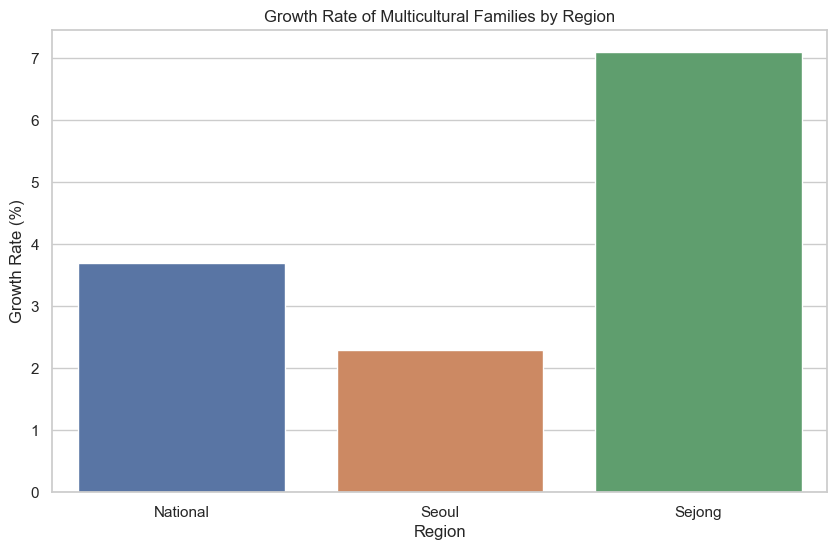

In [56]:

import matplotlib.pyplot as plt
import seaborn as sns

# 다문화 가구 데이터 준비
multicultural_data = {
    "Region": ["National", "Seoul", "Sejong"],
    "Multicultural Families": [399396, 72949, 1908],
    "Change from Last Year": [14177, 1612, 127],
    "Growth Rate (%)": [3.7, 2.3, 7.1]
}

# 데이터프레임 생성
multicultural_df = pd.DataFrame(multicultural_data)

# 시각화
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 다문화 가구 증감률 바 차트
sns.barplot(x="Region", y="Growth Rate (%)", data=multicultural_df)
plt.title("Growth Rate of Multicultural Families by Region")
plt.xlabel("Region")
plt.ylabel("Growth Rate (%)")

plt.show()

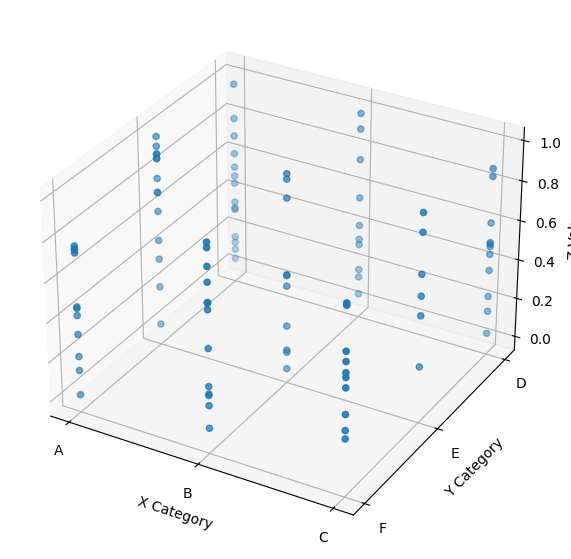

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 예시 데이터셋 생성
np.random.seed(0)
df = pd.DataFrame({
    'x': np.random.choice(['A', 'B', 'C'], size=100),
    'y': np.random.choice(['D', 'E', 'F'], size=100),
    'z': np.random.rand(100)
})

# 3D 그래프를 그리기 위한 데이터 처리
# 카테고리형 변수를 숫자로 변환
df['x_cat'] = df['x'].astype('category').cat.codes
df['y_cat'] = df['y'].astype('category').cat.codes

# 3D 그래프 그리기
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# x_cat, y_cat, z를 사용하여 그래프 그리기
scatter = ax.scatter(df['x_cat'], df['y_cat'], df['z'])

# 레이블 추가
ax.set_xlabel('X Category')
ax.set_ylabel('Y Category')
ax.set_zlabel('Z Value')

# 카테고리 레이블을 축에 표시
ax.set_xticks(range(len(df['x'].unique())))
ax.set_xticklabels(df['x'].unique())
ax.set_yticks(range(len(df['y'].unique())))
ax.set_yticklabels(df['y'].unique())

# 그래프 보여주기
plt.show()


In [2]:
import plotly.express as px

# Plotly를 사용하여 3D 산점도 그리기
fig_3d = px.scatter_3d(df, x='x', y='y', z='z', color='z', 
                       title='3D Scatter Plot with Plotly')
fig_3d.show()

# Plotly를 사용하여 박스 플롯 그리기
fig_box = px.box(df, y='z', title='Box Plot of Z Variable')
fig_box.show()

In [3]:
# Plotly를 사용하여 3D 산점도 그리기
fig_3d_scatter = px.scatter_3d(df, x='x', y='y', z='z', color='z', 
                                title='3D Scatter Plot with Plotly')
fig_3d_scatter.show()

# Plotly를 사용하여 3D 박스 플롯 그리기
# 각 'x', 'y' 카테고리 조합에 대한 'z' 값의 분포를 표시
fig_3d_box = px.box(df, x='x', y='z', color='y', 
                    title='3D Box Plot of Z Variable')

fig_3d_box.show()